# **Predicting the Price of TESLA Stock with LSTM Neural Networks**

In [31]:
#Importing all Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

# **Reading TESLA Stocks data from 2019 to Present**

In [32]:
# Reading the TESLA Stocks
df = pd.read_csv('/content/Tesla.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000
1,2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000
2,2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500
3,2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000
4,2019-01-08,68.391998,68.802002,65.403999,67.070000,67.070000,35042500
5,2019-01-09,67.099998,68.699997,66.293999,67.706001,67.706001,27164500
6,2019-01-10,66.879997,69.078003,66.358002,68.994003,68.994003,30282000
7,2019-01-11,68.417999,69.681999,67.753998,69.452003,69.452003,25195500
8,2019-01-14,68.475998,68.500000,66.800003,66.879997,66.879997,26236500
9,2019-01-15,67.000000,69.760002,66.900002,68.886002,68.886002,30283000


In [33]:
df.shape

(762, 7)

# **Data Understanding & Manipulation**

In [34]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [35]:
df = df.astype({"Close": float})

#As Seen through df.dtypes Date field's data type is object and needs transformed to 'datetime64'
from datetime import datetime
df["Date"] = pd.to_datetime(df.Date, format = '%Y-%m-%d')
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [36]:
#Identifying Missing Values
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [37]:
#Checking whether there is a Duplicate 'Date', is Present, needs to be removed
duplicateRowsDF = df[df.duplicated(['Date'])]
print("Duplicate Rows based on a single column are:", duplicateRowsDF)

Duplicate Rows based on a single column are: Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [38]:
df.index = df['Date']

## **Data Visualisation**

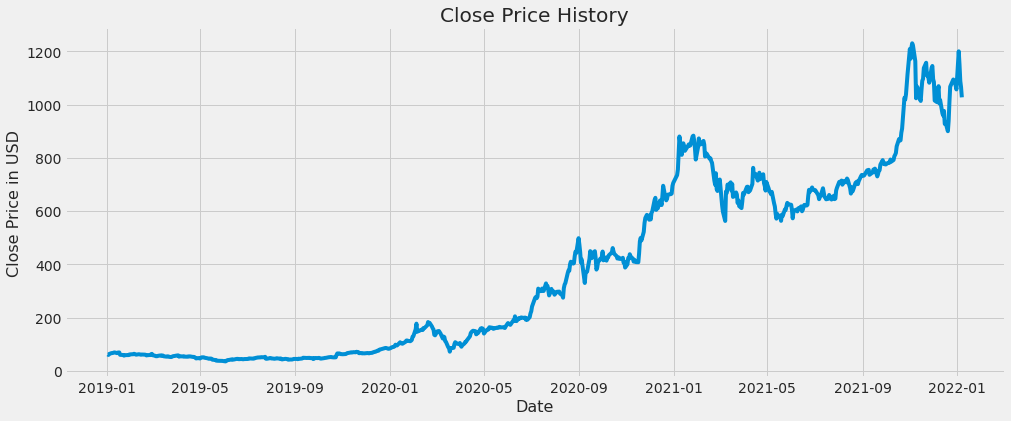

In [39]:
#Plotting the Time Series Graph for Telsa stocks since 2019 to Present
plt.figure(figsize=(15,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price in USD', fontsize=16)
plt.show()

# **Preparing Training DataSet**

In [40]:
# Creating a dataframe with just the 'Close' column 
data = df.filter(['Close'])

# Converting the dataframe to a numpy array
dataset = data.values

# Getting the number of rows to train the model
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

724

In [41]:
# Scaling the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02196604],
       [0.02033136],
       [0.02323392],
       [0.02612644],
       [0.02619176],
       [0.02672437],
       [0.027803  ],
       [0.02818654],
       [0.02603264],
       [0.02771255],
       [0.02798388],
       [0.02819491],
       [0.02064959],
       [0.02009018],
       [0.01819254],
       [0.01884909],
       [0.0197753 ],
       [0.01966476],
       [0.01984564],
       [0.02173993],
       [0.02144683],
       [0.02231609],
       [0.02242998],
       [0.02384693],
       [0.0231552 ],
       [0.0215289 ],
       [0.02124249],
       [0.02242161],
       [0.02224909],
       [0.02163944],
       [0.02090249],
       [0.02159087],
       [0.02121569],
       [0.02069983],
       [0.01880219],
       [0.01938505],
       [0.02006505],
       [0.01991264],
       [0.02273984],
       [0.02360072],
       [0.01939845],
       [0.01781904],
       [0.0163418 ],
       [0.01629155],
       [0.01635017],
       [0.0176147 ],
       [0.01875027],
       [0.017

In [42]:
# Creating scaled training dataset
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

#Keeping the time window as 60
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Converting the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.02196604, 0.02033136, 0.02323392, 0.02612644, 0.02619176,
       0.02672437, 0.027803  , 0.02818654, 0.02603264, 0.02771255,
       0.02798388, 0.02819491, 0.02064959, 0.02009018, 0.01819254,
       0.01884909, 0.0197753 , 0.01966476, 0.01984564, 0.02173993,
       0.02144683, 0.02231609, 0.02242998, 0.02384693, 0.0231552 ,
       0.0215289 , 0.02124249, 0.02242161, 0.02224909, 0.02163944,
       0.02090249, 0.02159087, 0.02121569, 0.02069983, 0.01880219,
       0.01938505, 0.02006505, 0.01991264, 0.02273984, 0.02360072,
       0.01939845, 0.01781904, 0.0163418 , 0.01629155, 0.01635017,
       0.0176147 , 0.01875027, 0.01748406, 0.018422  , 0.01858948,
       0.01615588, 0.01516101, 0.01482268, 0.01584938, 0.01591973,
       0.01433026, 0.01364189, 0.01487293, 0.01605539, 0.01669017])]
[0.016897856161859515]

[array([0.02196604, 0.02033136, 0.02323392, 0.02612644, 0.02619176,
       0.02672437, 0.027803  , 0.02818654, 0.02603264, 0.02771255,
       0.02798388, 0.02819491, 0.0

# **Building the LSTM model and Training the Model**

In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Building the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

664/664 [==============================] - 26s 34ms/step - loss: 0.0038


## **Create the Testing data set**

In [44]:
# Creating a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]

# Creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
#Converting the data to numpy array
x_test = np.array(x_test)

#Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

#Getting the model predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#Calculating root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

77.68180113955319

# **Visualise the predicted versus the actual stock values**

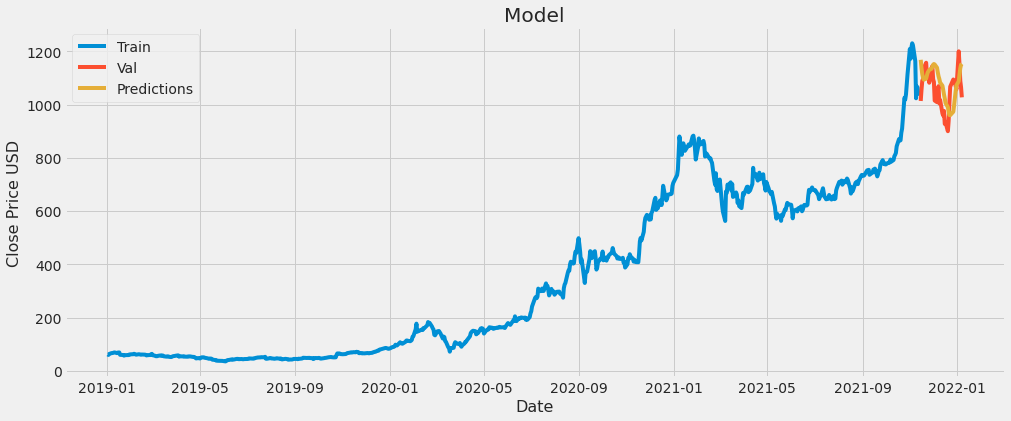

In [45]:
pd.options.mode.chained_assignment = None
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(15,6))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [46]:
valid

,Close,Predictions
Date,,
2021-11-15,1013.390015,1167.899780
2021-11-16,1054.729980,1137.757812
2021-11-17,1089.010010,1113.858398
2021-11-18,1096.380005,1099.610840
2021-11-19,1137.060059,1093.469482
2021-11-22,1156.869995,1097.519653
2021-11-23,1109.030029,1109.599243
2021-11-24,1116.000000,1120.248657
2021-11-26,1081.920044,1130.016846
